
<a href="https://colab.research.google.com/github/febse/ts2025/blob/main/02-Linear-Difference-Equations-Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open Class Version In Colab"/>Class Version</a>

<a href="https://colab.research.google.com/github/febse/ts2025/blob/main/02-Linear-Difference-Equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Difference Equations

## The Homogeneous Equation

They describe how a variable evolves over time (laws of motion). They are widely used in economics, finance, biology, and many other fields
because in a lot of application it is easier to think about how a variable changes from one period to the next rather than thinking about its absolute value.
The example of the bank account that we studied in the previous chapter is a simple example of a first order linear difference equation.
We saw last quite easy to describe the value of the bank account in a given month as a function of the value of the bank account in the previous month plus interest (assuming no deposits or withdrawals):

$$
x_{t} = (1 + 0.02) x_{t - 1}
$$

However it required more work to express the value of the bank account in month $t$ as
a function of the initial value of the bank account ($x_0$) and the time index $t$ (in other words to solve the equation):

$$
x_t = (1.02)^t x_0 
$$

In order to study how this systems described by an equation of this form move over time it helps to generalize the equation a bit. We will replace the specific number $1.02$ with a more general parameter $\phi$  and see what happens
for different values of $\phi$. Basically we will repeat the analysis that we did last time but with a few different values of $\phi$.

$$
x_t = \phi^{t} x_{0}
$$

To visualize the process for a single choice of $\phi$ and the initial value $x_0$ we only need to plug the concrete values in the formula above. For example, if $\phi = 0.8$ and $x_0 = 10$ then we have:

$$
x_t = 10 \cdot 0.8^t 
$$

Now set $t$ to 0, 1, 2, etc. to see how the value of $x_t$ evolves over time.

| $t$  | $x_t$    |
|----|--------|
| 0  | $10 \cdot 0.8^{0} = 10.0$ |
| 1  | $10 \cdot 0.8^{1} = 8.0$  |
| 2  | $10 \cdot 0.8^{2} = 6.4$  |
| 3  | $10 \cdot 0.8^{3} = 5.1$  |
| 4  | $10 \cdot 0.8^{4} = 4.1$  |
| 5  | $10 \cdot 0.8^{5} = 3.3$  |
| 6  | $10 \cdot 0.8^{6} = 2.6$  |
| 7  | $10 \cdot 0.8^{7} = 2.1$  |
| 8  | $10 \cdot 0.8^{8} = 1.7$  |


Now we want to do the same using `numpy` and `matplotlib` (to visualize the results).


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Set the number of periods to simulate (we want to be able to change it later)
T = 20

# Create a sequence of values for t running from 0 to T-1, e.g. t = [0, 1, 2, ..., 19] in our case when T = 20
t = np.arange(T)

# Print the sequence to check that it is correct
# Compare the values with the manual calculation in the table above
# to see that they are the same (up to rounding in the table)

print(t)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [7]:
# Now compute the formula for x_t (** means exponentiation, a single * means multiplication)

phi = 0.8
x_0 = 10

x_t = x_0 * phi**t

# Print the results
print(x_t)


[10.          8.          6.4         5.12        4.096       3.2768
  2.62144     2.097152    1.6777216   1.34217728  1.07374182  0.85899346
  0.68719477  0.54975581  0.43980465  0.35184372  0.28147498  0.22517998
  0.18014399  0.14411519]


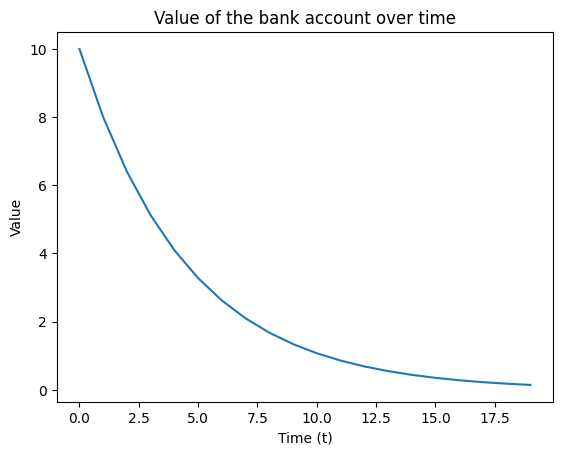

In [8]:
# Now plot the results
plt.plot(t, x_t)

# Add a title to the plot and labels to the axes
plt.title("Value of the bank account over time")
plt.xlabel("Time (t)")
plt.ylabel("Value")

# Show the plot
plt.show()


## Convergence

Our primary interest here is to see how the value of $x_t$ evolves over time for different values of $\phi$ and $x_0$.

As an exercise, try changing the value of $\phi$ and see what happens to the behavior of the system (look at how the plot changes). Also try changing the initial value $x_0$ and see what happens to the behavior of the system. You will notice that for values of $\phi$ that are between 0 and 1 the sequence of values goes down to zero when $t$ becomes large. The values also go down to zero for $-1< \phi < 0$ but in this case the sign of the values changes from minus to plus and back again. This is because odd powers of negative numbers are negative and even powers are positive.

For values of $\phi$ greater than 1 the values of $x_t$ go to infinity.

The following plot shows the behavior of the system for different values of $\phi$ greater than 0.


In [9]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(20)
x_0 = 10
phi = [0.8, 0.9, 0.95, 1.0, 1.005, 1.01, 1.02]

x = np.zeros((len(phi), len(t)))

for i in range(len(phi)):
    x[i, :] = x_0 * phi[i]**t

x


array([[10.        ,  8.        ,  6.4       ,  5.12      ,  4.096     ,
         3.2768    ,  2.62144   ,  2.097152  ,  1.6777216 ,  1.34217728,
         1.07374182,  0.85899346,  0.68719477,  0.54975581,  0.43980465,
         0.35184372,  0.28147498,  0.22517998,  0.18014399,  0.14411519],
       [10.        ,  9.        ,  8.1       ,  7.29      ,  6.561     ,
         5.9049    ,  5.31441   ,  4.782969  ,  4.3046721 ,  3.87420489,
         3.4867844 ,  3.13810596,  2.82429536,  2.54186583,  2.28767925,
         2.05891132,  1.85302019,  1.66771817,  1.50094635,  1.35085172],
       [10.        ,  9.5       ,  9.025     ,  8.57375   ,  8.1450625 ,
         7.73780937,  7.35091891,  6.98337296,  6.63420431,  6.3024941 ,
         5.98736939,  5.68800092,  5.40360088,  5.13342083,  4.87674979,
         4.6329123 ,  4.40126669,  4.18120335,  3.97214318,  3.77353603],
       [10.        , 10.        , 10.        , 10.        , 10.        ,
        10.        , 10.        , 10.        , 1

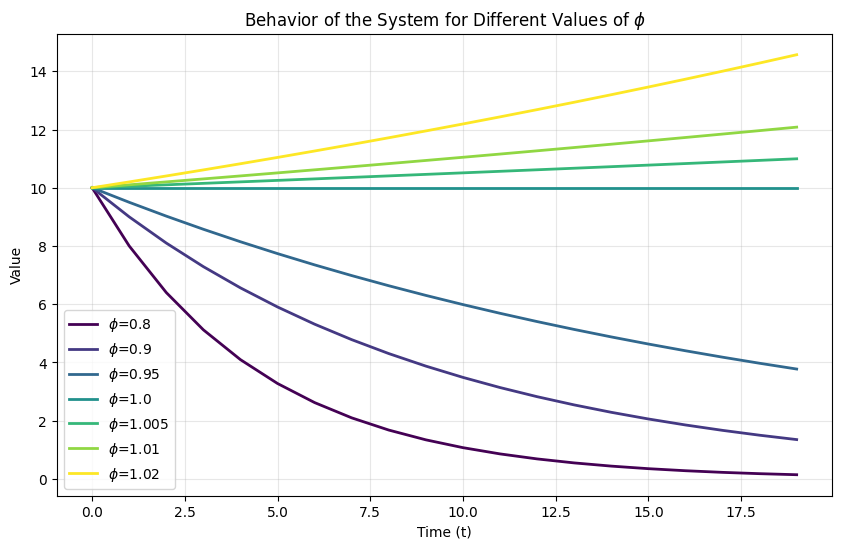

In [ ]:
#| label: fig-diff-eq-homogeneous-behavior
#| fig-cap: "Behavior of the homogeneous system for different values of $\\phi$"

# Plot the results with continuous color scale

plt.figure(figsize=(10, 6))

# Create a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(phi)))

for i in range(len(phi)):
    plt.plot(t, x[i], label=fr"$\phi$={phi[i]}", color=colors[i], linewidth=2)

plt.title(r"Behavior of the System for Different Values of $\phi$ greater than 0")
plt.xlabel(r"Time (t)")
plt.ylabel(r"Value")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

From @fig-diff-eq-homogeneous-behavior you can see that $\phi = 1$ is kind of a special boundary case. It corresponds to a situation where you neither earn nor pay interest on your bank account. Assuming there are no deposits or withdrawals or service fees,
the value of your bank account will not change over time (it will stay the same as the initial value $x_0$).

However, if $\phi$ is even slightly larger than 1 (for example $\phi = 1.01$) then the value of your bank account will grow over time without bound (it will go to infinity as $t$ goes to infinity).
Mathematically you say that the sequence of amounts over time ($x_1, x_2, \ldots, x_t$) diverges (has no limit).

$$
\lim_{t \to \infty} x_t = \lim_{t \to \infty} \phi^t x_0 = +\infty \quad \text{for any } \phi > 1, x_0 > 0
$$

For values less of $\phi$ that are smaller than 1 (for example $\phi = 0.98$) (meaning you pay interest on your bank account, this can actually happen in some countries with negative interest rates and means that you pay the bank for holding your money)
the value of your bank account will diminish over time and eventually go to zero (it will converge to zero as $t$ goes to infinity).

$$
\lim_{t \to \infty} x_t = \lim_{t \to \infty} \phi^t x_0 = 0 \quad \text{for any } 0 < \phi < 1
$$

The next case is when $\phi$ is negative. This does not make much sense in the context of a bank account but it can be useful in other contexts.

For example if $\phi = -1.01$ then the value of your bank account will oscillate between positive and negative values and diverge (it will go to plus or minus infinity as $t$ goes to infinity).


In [4]:
phi_neg = [-0.95, -1.0, -1.01]

t_neg = np.arange(30)
x_neg = np.zeros((len(phi_neg), len(t_neg)))

for i in range(len(phi_neg)):
    x_neg[i, :] = x_0 * phi_neg[i]**t_neg

x_neg

array([[ 10.        ,  -9.5       ,   9.025     ,  -8.57375   ,
          8.1450625 ,  -7.73780937,   7.35091891,  -6.98337296,
          6.63420431,  -6.3024941 ,   5.98736939,  -5.68800092,
          5.40360088,  -5.13342083,   4.87674979,  -4.6329123 ,
          4.40126669,  -4.18120335,   3.97214318,  -3.77353603,
          3.58485922,  -3.40561626,   3.23533545,  -3.07356868,
          2.91989024,  -2.77389573,   2.63520094,  -2.5034409 ,
          2.37826885,  -2.25935541],
       [ 10.        , -10.        ,  10.        , -10.        ,
         10.        , -10.        ,  10.        , -10.        ,
         10.        , -10.        ,  10.        , -10.        ,
         10.        , -10.        ,  10.        , -10.        ,
         10.        , -10.        ,  10.        , -10.        ,
         10.        , -10.        ,  10.        , -10.        ,
         10.        , -10.        ,  10.        , -10.        ,
         10.        , -10.        ],
       [ 10.        , -10.1   

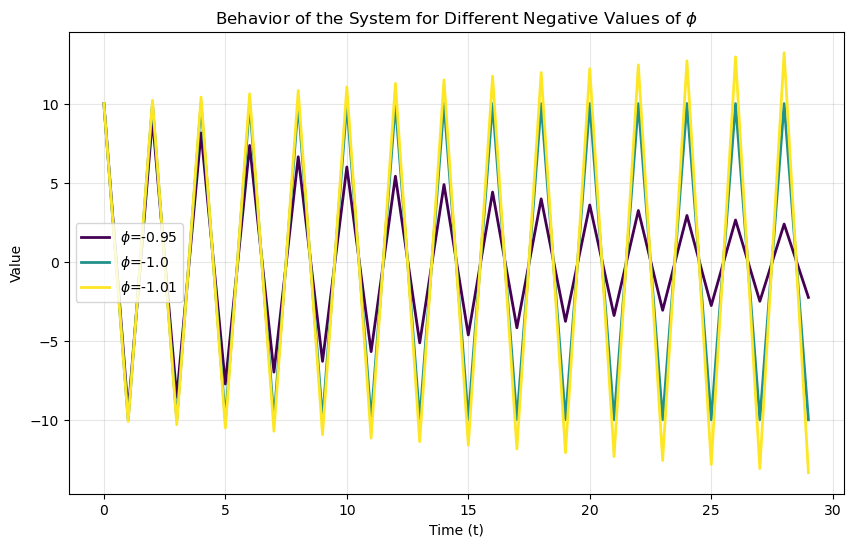

In [5]:
#| label: fig-diff-eq-homogeneous-behavior-negative
#| fig-cap: "Behavior of the homogeneous system for different negative values of $\\phi$"

# Plot the results with continuous color scale

plt.figure(figsize=(10, 6))
# Create a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(phi_neg)))
for i in range(len(phi_neg)):
    plt.plot(t_neg, x_neg[i], label=fr"$\phi$={phi_neg[i]}", color=colors[i], linewidth=2)

plt.title(r"Behavior of the System for Different Negative Values of $\phi$")
plt.xlabel(r"Time (t)")
plt.ylabel(r"Value")
plt.legend()
plt.grid(alpha=0.3)

From @fig-diff-eq-homogeneous-behavior-negative you can see that $\phi = -1$ is also a quite special boundary case.
Because taking an even power (e.g. $(-1)^2 = 1$) of a negative number gives a positive result and taking an odd power (e.g. $(-1)^3 = (-1)\times (-1) \times (-1) = -1 $) of a negative number gives a negative result,
the value of your bank account will flip from $x_0$ in even months to $-x_0$ in odd months.

Again, for values of $\phi$ that are slightly smaller than -1 (for example $\phi = -1.01$) the value of your bank account will oscillate between positive and negative values and diverge (it will go to plus or minus infinity as $t$ goes to infinity).

Only for $0 < \phi < -1$ does the value go to zero as $t$ goes to infinity (again, in an oscillating manner).

$$
\lim_{t \to \infty} x_t = \lim_{t \to \infty} \phi^t x_0 = 0 \quad \text{for any } -1 < \phi < 0
$$


We can also pose a related question. What happens with the system if we change the initial value $x_0$? In other words
we can ask: what is the effect of a small change in the initial value $x_0$ after a long time (as $t$ goes to infinity)?

Again, the answer depends on the value of $\phi$. Let's compare three scenarios: $\phi = 0.9$, $\phi = 1$, and $\phi = 1.1$.
In each case we will compare the trajectories of the system for two different initial values $x_0 = 100$ and $x_0 = 105$.

First let's do this on paper for the first case:

$$
\begin{align*}
x_t^{*} = \phi^t (x_0 + 5) = \phi^t x_0 + 5 \phi^t = x_t + 5 \phi^t \\
\end{align*}
$$

So the difference between the two trajectories is

$$
x_t^{*} - x_t = 5 \phi^t
$$

It is easy to see from this expression that for $\phi = 0.9$ the difference goes to zero as $t$ time goes to infinity (the two trajectories converge to each other).
However, for $\phi = 1$ the difference stays constant at 5 (it never disappears). For $\phi = 1.1$ the difference diverges (it gets larger and larger without bound as $t$ goes to infinity).

You can also answer this question by taking the derivative of $x_t$ with respect to $x_0$:

$$
\frac{\partial x_t}{\partial x_0} = \phi^t
$$


## The Non-Homogeneous Equation

As a next step we added deposits and withdrawals to the model, which we denoted by $e_t$ and assumed that the follow a uniform distribution between -5 and 5 but did not try to solve the equation:

$$
x_{t} = (1 + 0.02) x_{t - 1} + e_t
$$

The difference with the homogeneous equation is the presence of the $e_t$ term.

Our goal for today is to study the behavior (how does the value change over time) of systems described by first order linear difference equations.
First we want to write the equation in a more general form, so we will replace the 1.02 with a parameter $\phi$.

$$
x_{t} = \phi x_{t - 1} + e_t
$$

It will help if we can again solve the equation, that is express $x_t$ as a function of $x_0$, $\phi$, $e_t$ and $t$.
Luckily we can use the same approach as before.

It helps if we write the equation for a couple of periods.

$$
\begin{align}
t & \quad y_t \\
1 & \quad y_1 = \phi y_{0} + e_{1} \\
2 & \quad y_2 = \phi y_{1} + e_{2} \\
3 & \quad y_3 = \phi y_{2} + e_{3} \\
& \vdots \\
t & \quad y_{t} = \phi y_{t - 1} + e_{t} \\
t + 1 &  \quad y_{t + 1} = \phi y_{t} + e_{t + 1}\\
t + 2 & \quad y_{t + 2} = \phi y_{t + 1} + e_{t + 2}
\end{align}
$$

Try substituting the first equation into the second, then the second into the third equation.


::: {.callout-note collapse="true"}
## Click here to see the solution

$$
y_3 = \phi^3 y_0 + \phi^2 e_{1} + \phi e_{2} + \phi^0e_{3}
$$
:::

After that try writing the equation for $y_{t + 1}$ and substituting $y_t$ into it, then substituting $y_{t + 1}$ into the equation for $y_{t + 2}$.
and so forth until you see a pattern. After that generalize the result for $y_{t + j}$.



$$
y_{t + j} = \phi^{j + 1} y_{t - 1} + \phi^{j}e_{t} + \phi^{j - 1} e_{t + 1} + \ldots \phi^1 e_{t + j - 1} + \phi^0 e_{t + j}
$$
We can write this more compactly as:

$$
y_{t + j} = \phi^{j + 1} y_{t - 1} + \sum_{k = 0}^{j} \phi^{k} e_{t + j - k}
$$

You should check that the above formula is correct. Let's write it down for 
$j = 2$.

::: {.callout-note collapse="true"}
## Click here to see the result

$$
\begin{align}
y_{t + 2} = \phi^{2 + 1}y_{t - 1} & + \phi^0 e_{t + 2 - 0} \\
& + \phi^{1} e_{t + 2 - 1} \\
& + \phi^{2} e_{t + 2 - 2} \\
\end{align}
$$

Now we follow exactly the same logic as before and ask: 

1. What will happen to the value of $y_{t + j}$ as $j$ goes to infinity if we change one of the $e_t$ terms by a small amount?
2. What will happen to the value of $y_{t + j}$ as $j$ goes to infinity if we change all of the $e_t$ terms by a small amount?

As was the case with the initial condition in the homogeneous equation, the answer depends on the value of $\phi$.

The derivative of $y_{t + j}$ with respect to $e_t$ is:

$$
\frac{\partial y_{t + j}}{\partial e_t} = \phi^{j}
$$

So a tiny change in $e_t$ will change $y_{t + j}$ by $\phi^j$ times that tiny change. But we already known what happens to $\phi^j$ as $j$ goes to infinity from our analysis of the homogeneous equation.

- If $|\phi| < 1$ then $\phi^j$ goes to zero as $j$ goes to infinity. So a tiny change in $e_t$ will have no effect on $y_{t + j}$ for large $j$ (meaning after enough time has passed).
- If $|\phi| = 1$ then $\phi^j$ stays constant (meaning the effect of the change in $e_t$ will persist over time).
- If $|\phi| > 1$ then $\phi^j$ diverges (meaning the effect of the change in $e_t$ will get larger and larger over time without bound).


The following plot shows the two different behaviors for $\phi = 0.5$ and $\phi = 1.5$.


In [11]:
np.random.seed(41232)

t = np.arange(100)
x_0 = 10

phi = 0.5
e = np.random.uniform(-5, 5, size=len(t))

x = np.zeros((2, len(t)))

for i in range(len(t)):
    if i == 0:
        x[0, i] = x_0 + e[i]
        x[1, i] = x_0 + e[i] + 10
    else:
        x[0, i] = phi * x[0, i - 1] + e[i]
        x[1, i] = phi * x[1, i - 1] + e[i]

x

array([[ 1.36325418e+01,  5.25923045e+00,  5.63660368e+00,
         7.50304807e-01,  2.10698614e+00,  5.98083035e+00,
        -5.31245620e-01, -1.42435677e+00, -3.21723037e+00,
         1.57197646e+00,  8.23479999e-01, -2.47959768e+00,
         3.25796902e+00,  6.38937275e+00,  4.87199650e+00,
         4.35537791e-01,  3.77906909e+00,  2.83068716e-01,
        -2.66969516e-01,  4.14984601e+00,  1.71680872e+00,
         2.55901216e+00,  1.60141609e+00,  5.24205660e+00,
         6.57745184e+00,  7.83870833e-01, -5.12622177e-01,
         7.23195417e-01, -3.28262593e-01, -3.17374273e+00,
        -4.22982237e+00,  1.83182897e+00, -3.02980132e+00,
        -2.56872119e+00,  3.40411062e+00,  3.46438800e+00,
        -1.61075547e+00, -1.18696277e+00,  1.12644717e+00,
         8.82118223e-01, -5.99537024e-01,  3.08356991e+00,
        -2.48825924e+00, -1.25994964e+00,  2.50015526e+00,
         4.08294961e+00,  6.53456297e+00,  4.43640354e+00,
        -5.77657148e-01,  2.41399433e+00,  9.39633012e-0

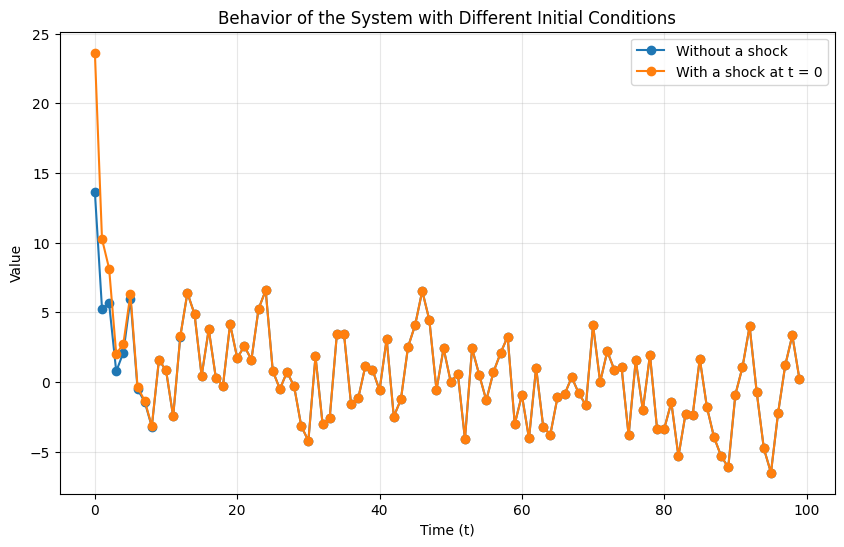

In [12]:
# Plot the two rows of x

plt.figure(figsize=(10, 6))
plt.plot(t, x[0], label="Without a shock", marker="o")
plt.plot(t, x[1], label="With a shock at t = 0", marker="o")
plt.title(r"Behavior of the System with Different Initial Conditions")
plt.xlabel(r"Time (t)")
plt.ylabel(r"Value")
plt.legend()
plt.grid(alpha=0.3)

In [8]:
x[1] - x[0]

array([1.00000000e+01, 5.00000000e+00, 2.50000000e+00, 1.25000000e+00,
       6.25000000e-01, 3.12500000e-01, 1.56250000e-01, 7.81250000e-02,
       3.90625000e-02, 1.95312500e-02, 9.76562500e-03, 4.88281250e-03,
       2.44140625e-03, 1.22070312e-03, 6.10351562e-04, 3.05175781e-04,
       1.52587891e-04, 7.62939453e-05, 3.81469727e-05, 1.90734863e-05,
       9.53674316e-06, 4.76837158e-06, 2.38418579e-06, 1.19209290e-06,
       5.96046448e-07, 2.98023224e-07, 1.49011612e-07, 7.45058060e-08,
       3.72529030e-08, 1.86264515e-08, 9.31322575e-09, 4.65661287e-09,
       2.32830644e-09, 1.16415322e-09, 5.82076609e-10, 2.91038305e-10,
       1.45519152e-10, 7.27595761e-11, 3.63797881e-11, 1.81898940e-11,
       9.09494702e-12, 4.54747351e-12, 2.27373675e-12, 1.13686838e-12,
       5.68434189e-13, 2.84217094e-13, 1.42108547e-13, 7.10542736e-14,
       3.55271368e-14, 1.77635684e-14, 8.88178420e-15, 4.44089210e-15,
       2.66453526e-15, 1.33226763e-15, 6.66133815e-16, 2.22044605e-16,
      

Now let's take a look at the effect of changing all of the $e_t$ terms by some amount (for example by adding 10 to each of them).

$$
\begin{align*}
y_{t + j}^{*} & = \phi^{j + 1} y_{t - 1} + \sum_{k = 0}^{j} \phi^{k} (e_{t + j - k} + 10) \\
              & = \phi^{j + 1} y_{t - 1} + \sum_{k = 0}^{j} \phi^{k} e_{t + j - k} + \sum_{k = 0}^{j} 10 \phi^{k} \\
              & = y_{t + j} + 10 \sum_{k = 0}^{j} \phi^{k} \\
\end{align*}
$$

Now the answer boils down to what happens to the sum $\sum_{k = 0}^{j} \phi^{k}$ as $j$ goes to infinity. By the way, you already known this series from basic algebra. It is a geometric series.

:::{#thm-geometric-series}
## Convergence of a Geometric Series

$$
S_{n} = 1 + \phi + \phi^2 + \phi^3 + \ldots + \phi^n
$$

Assuming that $\phi \neq 1$, this series can be expressed more compactly as 

$$
S_{n} = \frac{1 - \phi^{n + 1}}{1 - \phi}
$$

To see this, compute the difference between $S_n$ and $\phi S_n$ and rearrange.

If $|\phi| < 1 \iff -1 < \phi < 1$ the series has a limit for $n \to \infty$:

$$
\lim_{n \to \infty} S_{n} = \frac{1}{1 - \phi}
$$
:::

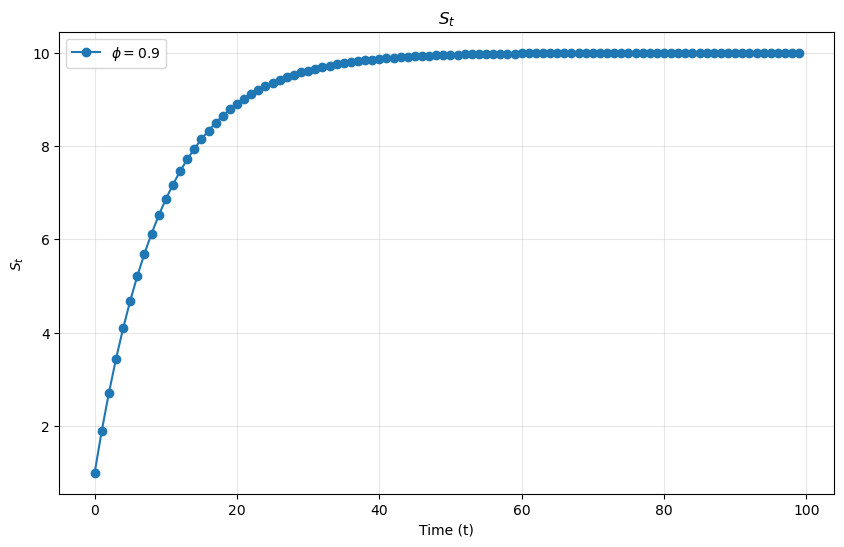

In [9]:
# Let us check it with code

t = np.arange(100)
phi = 0.9

S_t = np.cumsum(phi**t)

plt.figure(figsize=(10, 6))
plt.plot(t, S_t, label=rf"$\phi = {phi}$", marker="o")
plt.title(r"$S_t$")
plt.xlabel(r"Time (t)")
plt.ylabel(r"$S_t$")
plt.legend()
plt.grid(alpha=0.3)

## Second Order Linear Difference Equations

Until now we have only looked at a simple equation where the value of a variable at time $t$ depends only on its value at time $t - 1$. But what will happen if the value
of the variable at time $t$ not only depends on its value during the previous period but also on value of the period before that (at time $t - 2$)? In this case our
equation of motion will look like this (we will leave out the inhomogeneous part for simplicity):

$$
x_t = \phi_1 x_{t - 1} + \phi_2 x_{t - 2}
$$

How can we solve this equation? It turns out that there is an elegant approach
because we can represent the second order equation of a system of vector equations of first order.

$$
\begin{align*}
x_t & = \phi_1 x_{t - 1} + \phi_2 x_{t - 2}\\
x_{t - 1} & = x_{t - 1}\\
\end{align*}
$$

At a first glance we have not done anything useful. But the usefulness of this approach becomes apparent if we write the two equations above in matrix form.

$$
\begin{pmatrix}
x_t \\
x_{t - 1}
\end{pmatrix}
=
\begin{pmatrix}

\phi_1 & \phi_2 \\
1 & 0
\end{pmatrix}
\begin{pmatrix}
x_{t - 1} \\
x_{t - 2}
\end{pmatrix}
$$

Note that we have not done anything special, we have just rewritten the same equation in a different form.

Now we can begin thinking how to reduce this problem to the one that we already know how to solve (which is the first order case).
If we could somehow transform the equations so that we have only $x_t$ and $x_{t - 1}$ in one of the equations and 
$x_{t - 1}$ and $x_{t - 2}$ in the other equation then we would be done, because we would have two equations
of the form that we already know how to solve.

Let's see this in action with a numerical example.

With $\phi_1 = 0.5$ and $\phi_2 = 0.1$ the system of equations is:

$$
\begin{pmatrix}
x_t \\
x_{t - 1}
\end{pmatrix}
=
\begin{pmatrix}
0.5 & 0.1 \\
1 & 0
\end{pmatrix}
\begin{pmatrix}
x_{t - 1} \\
x_{t - 2}
\end{pmatrix}
$$

Next, I claim that the matrix 

$$
\begin{pmatrix}
0.5 & 0.4 \\
1 & 0
\end{pmatrix}
$$

can be decomposed as follows:

$$
\begin{pmatrix}
0.5 & 0.4 \\
1 & 0
\end{pmatrix} = 

\begin{pmatrix}
0.68 & -0.39 \\
0.73 & 0.92 
\end{pmatrix}
\begin{pmatrix}
0.93 & 0 \\
0 & -0.43
\end{pmatrix}
\begin{pmatrix}
1.00 & 0.43 \\
-0.80 & 0.74
\end{pmatrix}
$$

Ok, it is absolutely not obvious that this is true. But you can check it by
simply doing the matrix multiplications on the right hand side.
You will get the matrix on the left hand side (up to rounding errors, because I rounded the numbers in the matrices to save space).


There fore the system of equations can be written as:

$$
\begin{pmatrix}
x_t \\
x_{t - 1}
\end{pmatrix}
=
\begin{pmatrix}
0.68 & -0.39 \\
0.73 & 0.92
\end{pmatrix}
\begin{pmatrix}
0.93 & 0 \\
0 & -0.43
\end{pmatrix}
\begin{pmatrix}
1.00 & 0.43 \\
-0.80 & 0.74
\end{pmatrix}
\begin{pmatrix}
x_{t - 1} \\
x_{t - 2}
\end{pmatrix}
$$

Now we can pre-multiply both sides of the equation by the third matrix 

$$
\begin{pmatrix}
1.00 & 0.43 \\
-0.80 & 0.74
\end{pmatrix}
$$

to get:

$$
\begin{pmatrix}
1.00 & 0.43 \\
-0.80 & 0.74
\end{pmatrix}
\begin{pmatrix}
x_{t - 1} \\
x_{t - 2}
\end{pmatrix}
=
\begin{pmatrix}
1.00 & 0.43 \\
-0.80 & 0.74
\end{pmatrix}
\begin{pmatrix}
0.68 & -0.39 \\
0.73 & 0.92
\end{pmatrix}
\begin{pmatrix}
0.93 & 0 \\
0 & -0.43
\end{pmatrix}
\begin{pmatrix}
1.00 & 0.43 \\
-0.80 & 0.74
\end{pmatrix}
\begin{pmatrix}
x_{t - 1} \\
x_{t - 2}
\end{pmatrix}
$$



It may be not clear why why we are doing this but the magic thing is that the product
of the first two matrices on the right hand side is the identity matrix (up to rounding errors here):

$$
\begin{pmatrix}
0.68 & -0.39 \\
0.73 & 0.92
\end{pmatrix}
\begin{pmatrix}
0.93 & 0 \\
0 & -0.43
\end{pmatrix}
=
\begin{pmatrix}1 & 0 \\
0 & 1
\end{pmatrix}
$$

The equation therefore simplifies to:

$$
\begin{pmatrix}
1.00 & 0.43 \\
-0.80 & 0.74
\end{pmatrix}
\begin{pmatrix}
x_{t - 1} \\
x_{t - 2}
\end{pmatrix}
=
\begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}
\begin{pmatrix}
0.93 & 0 \\
0 & -0.43
\end{pmatrix}
\begin{pmatrix}
1.00 & 0.43 \\
-0.80 & 0.74
\end{pmatrix}
\begin{pmatrix}
x_{t - 1} \\
x_{t - 2}
\end{pmatrix}
$$

And we can skip the identity matrix as it does not change anything:

$$
\begin{pmatrix}
1.00 & 0.43 \\
-0.80 & 0.74
\end{pmatrix}
\begin{pmatrix}
x_{t - 1} \\
x_{t - 2}
\end{pmatrix}
=
\begin{pmatrix}
0.93 & 0 \\
0 & -0.43
\end{pmatrix}
\begin{pmatrix}
1.00 & 0.43 \\
-0.80 & 0.74
\end{pmatrix}
\begin{pmatrix}
x_{t - 1} \\
x_{t - 2}
\end{pmatrix}
$$


Let us look at the matrix multiplying the x vector on the left hand side which also appears as the last matrix/vector multiplication on the right hand side. Let's call
the product $\mathbf{z}_t$.

$$
\mathbf{z}_t = \begin{pmatrix}
\tilde{x}_t \\
\tilde{x}_{t - 1}
\end{pmatrix}
=
\begin{pmatrix}
1.00 & 0.43 \\
-0.80 & 0.74
\end{pmatrix}
\begin{pmatrix}
x_{t - 1} \\
x_{t - 2}
\end{pmatrix}
= \begin{pmatrix}
x_t + 0.43 x_{t - 1} \\
-0.80 x_{t - 1} + 0.74 x_{t - 2}
\end{pmatrix}
$$

$$
\mathbf{z}_{t - 1} = \begin{pmatrix}
\tilde{x}_{t - 1} \\
\tilde{x}_{t - 2}
\end{pmatrix}
=
\begin{pmatrix}
1.00 & 0.43 \\
-0.80 & 0.74
\end{pmatrix}
\begin{pmatrix}
x_{t - 1} \\
x_{t - 2}
\end{pmatrix}
= \begin{pmatrix}
x_{t - 1} + 0.43 x_{t - 2} \\
-0.80 x_{t - 2} + 0.74 x_{t - 3}
\end{pmatrix}
$$

Plug these two equations into the equation above to obtain:

$$
\begin{pmatrix}
\tilde{x}_t \\
\tilde{x}_{t - 1}
\end{pmatrix}
= 
\begin{pmatrix}
0.93 & 0 \\
0 & -0.43
\end{pmatrix}
\begin{pmatrix}
\tilde{x}_{t - 1} \\
\tilde{x}_{t - 2}
\end{pmatrix}
$$

Or more compactly:

$$
\mathbf{z}_t = \mathbf{\Lambda} \mathbf{z}_{t - 1}
$$

Now, you may wonder why we did all this. The whole point of the transformation was that the system of transformed has a very simple structure.
See what happens when we investigate the stability of the transformed system by substituting for $\mathbf{z}_{t - 1}$ in the equation above:

$$
\mathbf{z}_t = \mathbf{\Lambda} \mathbf{\Lambda} \mathbf{z}_{t - 2}
$$

$$
\mathbf{z}_t = \mathbf{\Lambda}^3 \mathbf{z}_{t - 3}
$$

$$
\mathbf{z}_t = \mathbf{\Lambda}^j \mathbf{z}_{t - j}
$$

This looks just like the univariate case that we studied in the previous chapter and with the added benefit that it is now very easy to compute
the powers of $\mathbf{\Lambda}$ because it is a diagonal matrix. For any diagonal matrix $\mathbf{\Lambda}$ we have:

$$
\mathbf{\Lambda}^j = \begin{pmatrix}
\lambda_1^j & 0 \\
0 & \lambda_2^j
\end{pmatrix}
$$

In this case you should check the computation:

$$
\begin{pmatrix}
0.93 & 0 \\
0 & -0.43
\end{pmatrix}
\begin{pmatrix}
0.93 & 0 \\
0 & -0.43
\end{pmatrix}
=
\begin{pmatrix}
0.93^2 + 0 & 0 + 0 \\
0 + 0 & 0 + (-0.43)^2
\end{pmatrix}
=
\begin{pmatrix}
0.93^2 & 0 \\
0 & (-0.43)^2
\end{pmatrix}
$$

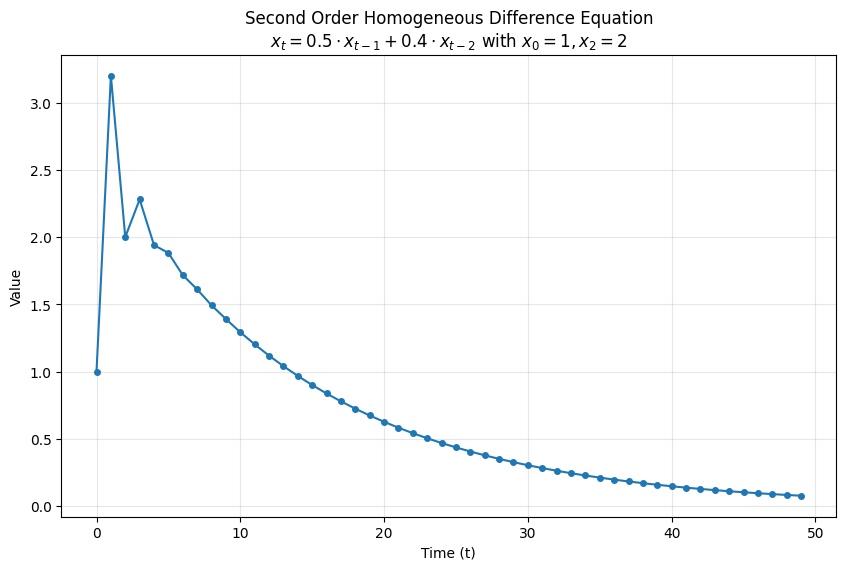

First 10 values:
x_0 = 1.0
x_1 = 3.2000
x_2 = 2.0000
x_3 = 2.2800
x_4 = 1.9400
x_5 = 1.8820
x_6 = 1.7170
x_7 = 1.6113
x_8 = 1.4925
x_9 = 1.3907


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
# Try changing the values here and see what happens in the plot
# does the sequence of values converge or does it explode?

phi_1 = 0.5
phi_2 = 0.4

# Initial conditions
x_0 = 1
x_1 = 3.2

# Number of time steps
T = 50
t = np.arange(T)

# Initialize array (we create an array of zeros with the size of T)
# We will use this to store the values of x_t when we compute them 
# in the following step

x = np.zeros(T)
x[0] = x_0
x[1] = x_1

# Now we start going through the values 
# For t = 2: x[2] = 0.5 * x[1] + 0.4 * x[0] (and store the result in x[2] so that the next iteration can access it)
# For t = 3: x[3] = 0.5 * x[2] + 0.4 * x[1] and compute x[3] (and store the result in x[3] for the same reason)
# and so on...

for i in range(2, T):
    x[i] = phi_1 * x[i-1] + phi_2 * x[i-2]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, x, marker='o', markersize=4)
plt.title('Second Order Homogeneous Difference Equation\n' + 
          r'$x_t = 0.5 \cdot x_{t-1} + 0.4 \cdot x_{t-2}$ with $x_0=1, x_2=2$')
plt.xlabel('Time (t)')
plt.ylabel('Value')
plt.grid(alpha=0.3)
plt.show()

# Print first few values to verify
print("First 10 values:")
print(f"x_0 = {x[0]}")
print(f"x_1 = {x[1]:.4f}")
print(f"x_2 = {x[2]:.4f}")
for i in range(3, 10):
    print(f"x_{i} = {x[i]:.4f}")

From the last equation and the simulation we can see that just as in the univariate case the stability of the system depends on the magnitude of the diagonal elements of the matrix $\mathbf{\Lambda}$. If these are 
between 0 and 1 in absolute value, the system will return to equilibrium after a shock in its initial conditions. Otherwise, it will show explosive behavior. So the key to studying
the stability is in the diagonal elements of the matrix $\mathbf{\Lambda}$. But how did we find these exactly? Here we need a little bit of linear algebra. It turns out that the diagonal elements of $\mathbf{\Lambda}$ are the eigenvalues of the matrix $\mathbf{A}$. But what are the eigenvalues?

Let's look at what a square matrix actually does when we multiply a vector by it.

Let's take the matrix from our example:

$$
\mathbf{A} = \begin{pmatrix}
0.5 & 0.4 \\
1 & 0
\end{pmatrix}
$$

and some vector $\mathbf{s}$:

$$
\mathbf{s} = \begin{pmatrix}
1 \\
1
\end{pmatrix}

The result from the multiplication is:

$$
\mathbf{A} \mathbf{s} = \begin{pmatrix}
0.5 & 0.4 \\
1 & 0
\end{pmatrix}
\begin{pmatrix}
1 \\
1
\end{pmatrix}
=
\begin{pmatrix}
0.5 \cdot 1 + 0.4 \cdot 1 \\
1 \cdot 1 + 0 \cdot 1
\end{pmatrix}
=
\begin{pmatrix}
0.9 \\
1
\end{pmatrix}
$$

Now, let's take another vector $\mathbf{s}$ and multiply it by $\mathbf{A}$:

$$


In [6]:
# Check that the decomposition is correct (up to rounding errors)

G = np.array([
    [ 0.68, -0.39],
    [0.73,  0.92]
])
L = np.array([
    [0.93, 0],
    [0, -0.43]
])
G1 = np.array([
    [1.0,  0.43],
    [-0.80,  0.74]
])

(G @ L @ G1).round(2)

array([[ 0.5,  0.4],
       [ 1. , -0. ]])

In [13]:
(G1 @ G @ L).round(2)

array([[ 0.92, -0.  ],
       [-0.  , -0.43]])

There are two things to notice about these matrices. First, the middle matrix is a diagonal matrix (it has non-zero elements only on the main diagonal).
Second, not at all obvious thing is that if you multiply the first matrix on the right hand side with the last matrix on the right hand side
you will get the identity matrix (up to rounding errors).

In [149]:
(G @ G1).round(1)

array([[ 1.,  0.],
       [-0.,  1.]])

$$
\mathbf{A} = \mathbf{V}
\begin{pmatrix}
\lambda_1 & 0 \\
0 & \lambda_2
\end{pmatrix}
\mathbf{V}^{-1}
$$

Using this decomposition, we can transform the complicated problem to a simple one with only diagonal entries in the matrix before $\mathbf{z}_{t - 1}$.

$$
\begin{align}
\mathbf{z}_{t} & = \mathbf{A} \mathbf{z}_{t - 1} + \mathbf{e}_{t} \\
\mathbf{z}_{t} & = \mathbf{V} \mathbf{\Lambda}\mathbf{V^{-1}} \mathbf{z}_{t - 1} + \mathbf{e}_{t} \\
\mathbf{V}^{-1} \mathbf{z}_{t} & = \mathbf{V}^{-1} \mathbf{V}\mathbf{\Lambda}\mathbf{V}^{-1} \mathbf{z}_{t - 1} + \mathbf{V}^{-1}\mathbf{e}_{t} \\
\mathbf{V}^{-1} \mathbf{z}_{t} & = \mathbf{\Lambda}\mathbf{V}^{-1} \mathbf{z}_{t - 1} + \mathbf{V}^{-1}\mathbf{e}_{t} \\
\tilde{\mathbf{z}}_{t} & = \mathbf{\Lambda} \tilde{\mathbf{z}}_{t - 1} + \tilde{\mathbf{e}_{t}}
\end{align}
$$

Now, we can solve the difference equation in the simple case. Once we have found the
solutions, we can transform them back to the original variables $x_t$ and $y_t$.

For the purposes of this course, however, our focus lies on the behavior 
of the system: Does it converge to a stable path?

The answer is in the matrix $\mathbf{A}$. When we start doing the
the recursive substitution that we did in the scalar case, the transformed equations
will look like this:

$$
\begin{align}
\tilde{\mathbf{z}}_{t} & = \mathbf{\Lambda} \tilde{\mathbf{z}}_{t - 1} + \tilde{\mathbf{e}}_{t} \\
\tilde{\mathbf{z}}_{t + 1} & = \mathbf{\Lambda} (\mathbf{\Lambda} \tilde{\mathbf{z}}_{t - 1} + \tilde{\mathbf{e}}_{t}) + \tilde{\mathbf{e}}_{t + 1} \\
\implies \tilde{\mathbf{z}}_{t + 1} & = \mathbf{\Lambda}^2 \tilde{\mathbf{z}}_{t - 1} +\mathbf{\Lambda} \tilde{\mathbf{e}}_{t} + \tilde{\mathbf{e}}_{t + 1}\\
\tilde{\mathbf{z}}_{t + j} & = \mathbf{\Lambda}^{j + 1} \tilde{\mathbf{z}}_{t - 1} + \sum_{k = 0}^{j} \mathbf{\Lambda}^{k} \tilde{\mathbf{e}}_{t + j - k}
\end{align}
$$

You can continue the substitution just like we did in @exr-autonomous-solution. At this
point, you should realize that the system's behavior depends on the matrix $\mathbf{\Lambda}$. If the elements of $\mathbf{\Lambda|$ are less than one in absolute value, the system will return to equilibrium after a shock. Otherwise, it will show explosive behavior. This
leads us to the following problem: How do we find the values of the diagonal matrix? We will make
use of a result from linear algebra.

:::{#thm-eigenvalues}
## Eigenvalues


The eigenvalues of a square matrix $\mathbf{A}$ are the solutions of the following equation.

$$
\det(\mathbf{A} - \lambda\mathbf{I}) = 0
$$
:::

In [137]:
phi_1 = 0.5
phi_2 = 0.4

evals, evecs = np.linalg.eig(np.array([[phi_1, phi_2], [1, 0]]))

print("Eigenvalues:")
print(evals)
print("Inverse Eigenvectors:")
print(np.linalg.inv(evecs))

print("Eigenvectors:")
print(evecs)

print("Else:")
Phi = np.array([[phi_1, phi_2], [1, 0]])
evecs @ np.diag(evals) @ np.linalg.inv(evecs)


Eigenvalues:
[ 0.93007353 -0.43007353]
Inverse Eigenvectors:
[[ 1.00405577  0.4318178 ]
 [-0.80032535  0.74436142]]
Eigenvectors:
[[ 0.68104151 -0.39508475]
 [ 0.73224481  0.91864467]]
Else:


array([[5.00000000e-01, 4.00000000e-01],
       [1.00000000e+00, 1.11022302e-16]])